# Churn Prediction

In [1]:
import pandas as pd

### Load Datasets

In [2]:
data=pd.read_csv("churn_prediction.csv")

### Explorative Data Analysis

#### Make function gives all detail related to column

In [7]:
def col_info(data):
    for columns in data:
        print(f'{columns} {data[columns].unique()} {data[columns].dtypes}')

In [8]:
col_info(data)

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] object
gender ['Female' 'Male'] object
SeniorCitizen [0 1] int64
Partner ['Yes' 'No'] object
Dependents ['No' 'Yes'] object
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] int64
PhoneService ['No' 'Yes'] object
MultipleLines ['No phone service' 'No' 'Yes'] object
InternetService ['DSL' 'Fiber optic' 'No'] object
OnlineSecurity ['No' 'Yes' 'No internet service'] object
OnlineBackup ['Yes' 'No' 'No internet service'] object
DeviceProtection ['No' 'Yes' 'No internet service'] object
TechSupport ['No' 'Yes' 'No internet service'] object
StreamingTV ['No' 'Yes' 'No internet service'] object
StreamingMovies ['No' 'Yes' 'No internet service'] object
Contract ['Month-to-month' 'One year' 'Two year'] object
PaperlessBill

#### drop customerID column because it does not making sense in prediction

In [9]:
data.drop('customerID',inplace=True,axis=1)

In [10]:
print(data['TotalCharges'].dtypes)
data['TotalCharges'].iloc[0]

object


'29.85'

#### Some blank string in column TotalCharges

In [11]:
pd.to_numeric(data['TotalCharges'])

ValueError: Unable to parse string " " at position 488

#### Remove rows from the data which contain blank string

In [12]:
new_data=data[data['TotalCharges']!=' ']

In [13]:
new_data.shape

(7032, 20)

In [14]:
data.shape

(7043, 20)

#### Now change TotalCharges column datatype from str to float

In [15]:
new_data['TotalCharges']=pd.to_numeric(new_data['TotalCharges'])

In [16]:
new_data['TotalCharges'].dtypes

dtype('float64')

#### Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [17]:
def replace_with_no(df,col):
    n=len(df)
    
    for i in range(n):
        df[col].iloc[i]=df[col].iloc[i].split(" ")[0]
    return df

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
col_replace_list=['OnlineSecurity',"DeviceProtection","TechSupport","StreamingTV","StreamingMovies","MultipleLines","OnlineBackup"]

for col in col_replace_list:
    new_data=replace_with_no(new_data,col)

In [20]:
col_info(new_data)

gender ['Female' 'Male'] object
SeniorCitizen [0 1] int64
Partner ['Yes' 'No'] object
Dependents ['No' 'Yes'] object
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] int64
PhoneService ['No' 'Yes'] object
MultipleLines ['No' 'Yes'] object
InternetService ['DSL' 'Fiber optic' 'No'] object
OnlineSecurity ['No' 'Yes'] object
OnlineBackup ['Yes' 'No'] object
DeviceProtection ['No' 'Yes'] object
TechSupport ['No' 'Yes'] object
StreamingTV ['No' 'Yes'] object
StreamingMovies ['No' 'Yes'] object
Contract ['Month-to-month' 'One year' 'Two year'] object
PaperlessBilling ['Yes' 'No'] object
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] object
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] float64
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6 

#### One hot encoding for categorical columns

In [21]:
df1=pd.get_dummies(new_data,columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
col_info(df1)

gender ['Female' 'Male'] object
SeniorCitizen [0 1] int64
Partner ['Yes' 'No'] object
Dependents ['No' 'Yes'] object
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] int64
PhoneService ['No' 'Yes'] object
MultipleLines ['No' 'Yes'] object
OnlineSecurity ['No' 'Yes'] object
OnlineBackup ['Yes' 'No'] object
DeviceProtection ['No' 'Yes'] object
TechSupport ['No' 'Yes'] object
StreamingTV ['No' 'Yes'] object
StreamingMovies ['No' 'Yes'] object
PaperlessBilling ['Yes' 'No'] object
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] float64
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] float64
Churn ['No' 'Yes'] object
InternetService_DSL [ True False] bool
InternetService_Fiber optic [False  True] bool
InternetService_No [False  True] bool
Contract_Month-to-month [ True False] bool
Contract

In [23]:
yes_no_col=['Partner','Dependents','PhoneService','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_col:
    df1[col]=df1[col].replace({'No':0,'Yes':1})

In [24]:
true_false_col=[]

for col in df1.columns:
    if df1[col].dtypes==bool:
        true_false_col.append(col)
for col in true_false_col:
    df1[col]=df1[col].replace({False:0,True:1})

In [25]:
col_info(df1)

gender ['Female' 'Male'] object
SeniorCitizen [0 1] int64
Partner [1 0] int64
Dependents [0 1] int64
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] int64
PhoneService [0 1] int64
MultipleLines [0 1] int64
OnlineSecurity [0 1] int64
OnlineBackup [1 0] int64
DeviceProtection [0 1] int64
TechSupport [0 1] int64
StreamingTV [0 1] int64
StreamingMovies [0 1] int64
PaperlessBilling [1 0] int64
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] float64
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] float64
Churn [0 1] int64
InternetService_DSL [1 0] int64
InternetService_Fiber optic [0 1] int64
InternetService_No [0 1] int64
Contract_Month-to-month [1 0] int64
Contract_One year [0 1] int64
Contract_Two year [0 1] int64
PaymentMethod_Bank transfer (automatic) [0 1] int64
PaymentMethod_Credit

In [26]:
df1['gender']=df1['gender'].replace({'Female':0,'Male':1})

In [27]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


#### Preprocessing

In [28]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df1[col_to_scale]=scaler.fit_transform(df1[col_to_scale])

In [29]:
X=df1.drop('Churn',axis=1)
y=df1['Churn']

#### train test split

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [31]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3946,0,0,0,0,0.112676,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3394,1,0,0,0,0.352113,1,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0
1635,0,0,0,0,0.028169,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4088,1,0,0,0,0.084507,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1886,1,0,1,1,0.929577,1,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1,0,0,0,0.028169,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
5199,0,0,0,0,0.704225,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
5235,1,0,0,0,0.112676,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
5399,0,0,0,0,0.690141,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


#### Build model using ANN

In [32]:
import tensorflow as tf

In [33]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(26,activation='relu',input_shape=(26,)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train,y_train,epochs=100)

Epoch 1/100
154/154 [==============================] - 2s 3ms/step - loss: 0.5015 - accuracy: 0.7527
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.7954
Epoch 3/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 0.8017
Epoch 4/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4164 - accuracy: 0.8070
Epoch 5/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4155 - accuracy: 0.8003
Epoch 6/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8058
Epoch 7/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4113 - accuracy: 0.8058
Epoch 8/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.8048
Epoch 9/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.8084
Epoch 10/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4081 - accura

154/154 [==============================] - 0s 3ms/step - loss: 0.3513 - accuracy: 0.8324
Epoch 82/100
154/154 [==============================] - 0s 3ms/step - loss: 0.3533 - accuracy: 0.8310
Epoch 83/100
154/154 [==============================] - 0s 3ms/step - loss: 0.3519 - accuracy: 0.8340
Epoch 84/100
154/154 [==============================] - 0s 3ms/step - loss: 0.3517 - accuracy: 0.8326
Epoch 85/100
154/154 [==============================] - 0s 3ms/step - loss: 0.3503 - accuracy: 0.8326
Epoch 86/100
154/154 [==============================] - 0s 3ms/step - loss: 0.3500 - accuracy: 0.8350
Epoch 87/100
154/154 [==============================] - 0s 3ms/step - loss: 0.3498 - accuracy: 0.8352
Epoch 88/100
154/154 [==============================] - 0s 3ms/step - loss: 0.3485 - accuracy: 0.8346
Epoch 89/100
154/154 [==============================] - 0s 3ms/step - loss: 0.3476 - accuracy: 0.8371
Epoch 90/100
154/154 [==============================] - 0s 3ms/step - loss: 0.3482 - accuracy: 

In [36]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.7796


[0.4849206507205963, 0.7796208262443542]

In [37]:
y_pred=model.predict(X_test)

66/66 [==============================] - 0s 2ms/step


In [38]:
prediction=[]
for ele in y_pred:
    if ele>0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [39]:
prediction[:5]

[0, 0, 1, 0, 0]

In [40]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

#### Classification Report

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1549
           1       0.60      0.53      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110



Text(50.722222222222214, 0.5, 'Truth')

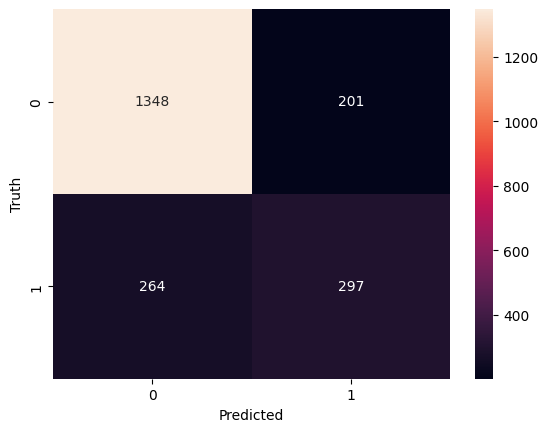

In [42]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [43]:
cm

array([[1348,  201],
       [ 264,  297]], dtype=int64)

#### Accuracy

In [44]:
round((1367+302)/(1367+182+259+302),2)

0.79

#### Precision(0)

In [45]:
round((1367)/(1367+259),2)

0.84

#### Precision(1)

In [46]:
round((302)/(302+182),2)

0.62

#### recall(0)

In [47]:
round((1367)/(1367+182),2)

0.88

#### recall(1)

In [48]:
round((302)/(259+302),2)

0.54